Problem Statement for the Advertising data

The dateset file consists of advertising expenditure incurred on different mediums and the overall increase in revenue that was seen during that time. For any business, advertising their products is very essential because it aids in the fast selling of a product, increases the popularity and awareness of the product in the market, which in turn, increases the overall sales for the product. But more than that, what matters for the business is that correct amount of investment should be done upon the advertisements such that it generates good return on investments otherwise it will just lead to an added expenditure.
The dateset contains statistics about the increase in sales of a product in 200 different months, together with advertising budgets in each of these months for different media channels: TV, radio and newspaper. The budget and the increase in sales is in thousands of dollars.
You are expected to implement regression technique and predict what would be the increase in sales given the advertisement expenditure for that month. You are free to use any ML algorithms, evaluate, fine tune and reach a best model. Also derive additional/meaningful insights from the data which can help the organization to decide upon the right channels and amount of investments to be done on each media channel.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
ad = pd.read_csv('Advertising.csv')

In [ ]:
ad.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
ad

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [ ]:
print(ad.dtypes)

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object


In [ ]:
ad.isnull().sum()

,0
Unnamed: 0,0
TV,0
radio,0
newspaper,0
sales,0


In [ ]:
ad.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

Pre Assumptions

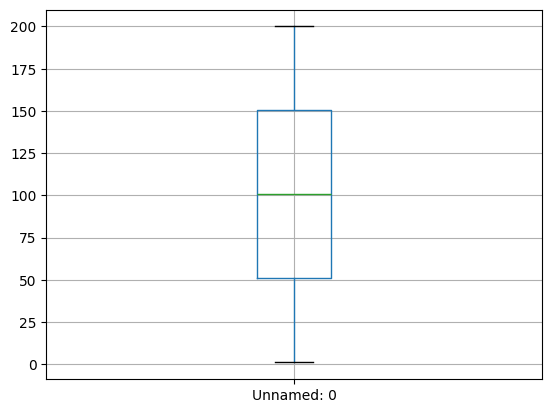

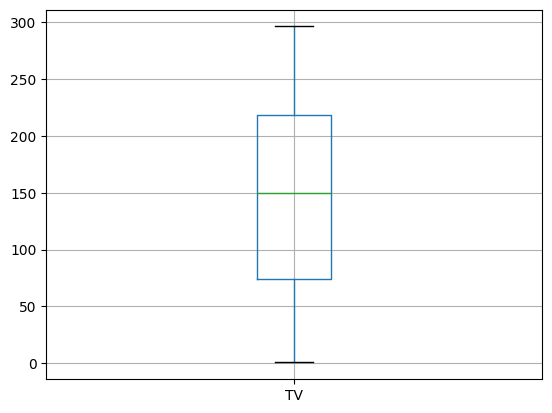

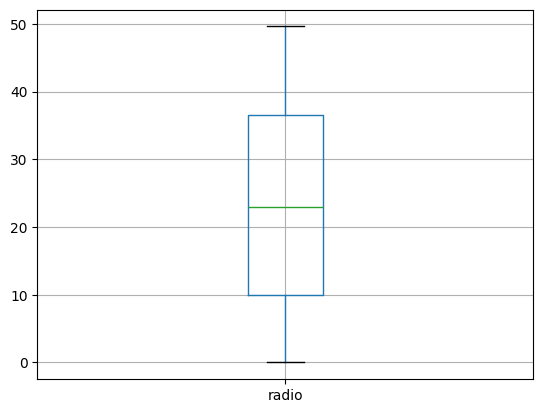

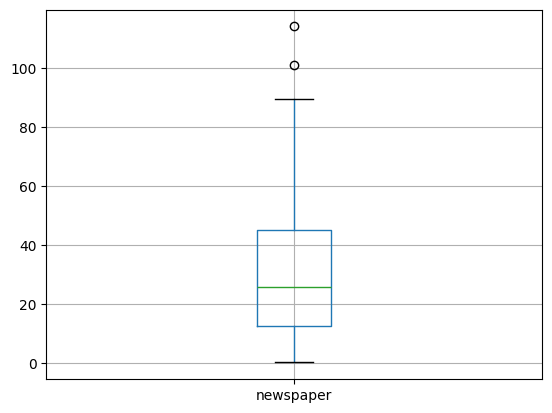

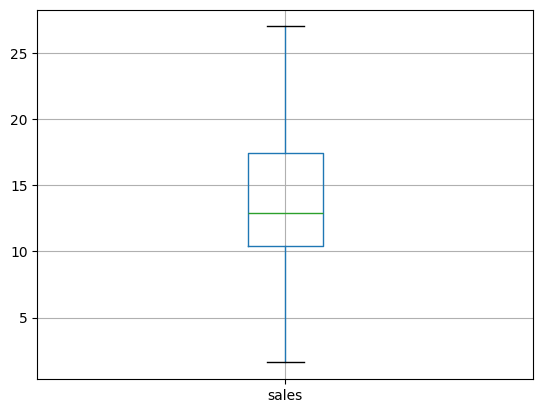

In [ ]:
#Assuming 1: There should be no outliers in the data
#checking using boxplot
for i in ad.columns:
  ad.boxplot(column=i)
  plt.show()

In [ ]:
ad[ad["newspaper"]>90]

,Unnamed: 0,TV,radio,newspaper,sales
16,17,67.8,36.6,114.0,12.5
101,102,296.4,36.3,100.9,23.8


In [ ]:
df=ad[ad["newspaper"]<90]
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [ ]:
ad.drop(ad[ad["newspaper"]>90].index) #if inplace= True (fix the data)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


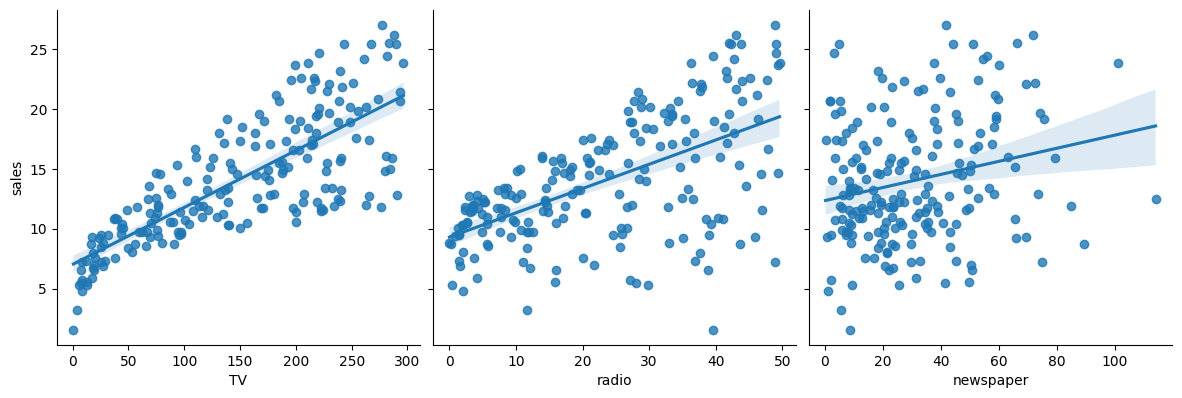

In [ ]:
#Assumption 2: Assumption of linearity : Every independent variable should have a
# linear relationship with dependent variable
sns.pairplot(ad, x_vars=['TV','radio','newspaper'], y_vars='sales', height=4, aspect=1, kind='reg')
plt.show()

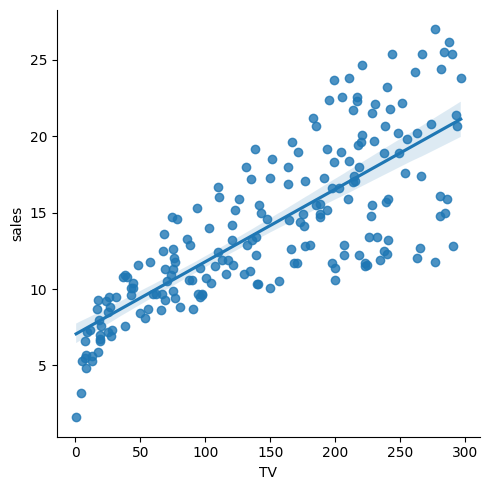

In [ ]:
sns.lmplot(x='TV',y='sales',data=ad)
plt.show()

In [ ]:
ad.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [ ]:
X = ad.loc[:,['TV', 'radio', 'newspaper']]
Y= ad.loc[: , 'sales']

In [ ]:
Y.shape

(200,)

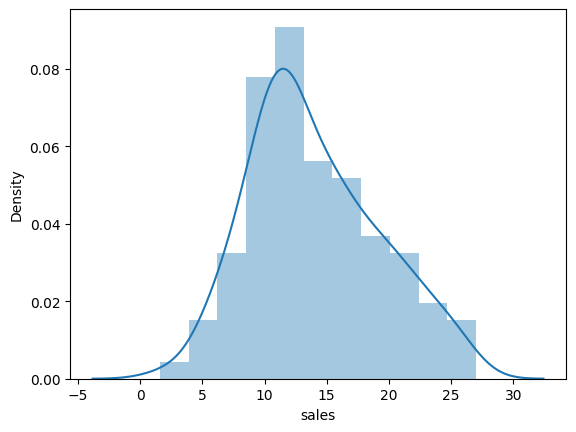

In [ ]:
#Assumption 3: Normality : The dependent variable should follow an approximate normal distributed
sns.distplot(Y)
plt.show()

In [ ]:
from scipy.stats import skew
skew(Y)

np.float64(0.4045082487061191)

In [ ]:
# Log transformation
#import numpy as np
#Y_log = np.log(Y)
#Y_log # Skewness is lesser

,sales
0,3.095578
1,2.341806
2,2.230014
3,2.917771
4,2.557227
...,...
195,2.028148
196,2.272126
197,2.549445
198,3.238678


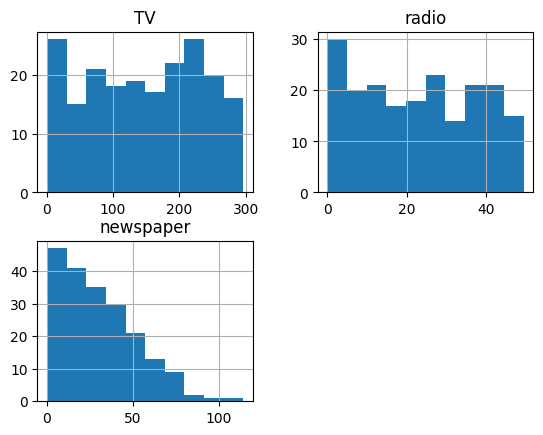

In [ ]:
X.hist(bins= 10)
plt.show()

In [ ]:
from scipy.stats import skew
#finding the skewness in each variable
ad_num_skew= X.apply(lambda i: skew(i.dropna()))
#subsetting the variable that r highly skewed
ad_num_skewed = ad_num_skew[(ad_num_skew> .75) | (ad_num_skew<- .75)]
print(ad_num_skew)
print(ad_num_skewed)

TV          -0.069328
radio        0.093467
newspaper         NaN
dtype: float64
Series([], dtype: float64)


In [ ]:
import numpy as np
#apply log + 1 transformaion for all numeric features with skewness over .75
X[ad_num_skewed.index] = np.log(X[ad_num_skewed.index])
new= np.log1p(X["newspaper"])

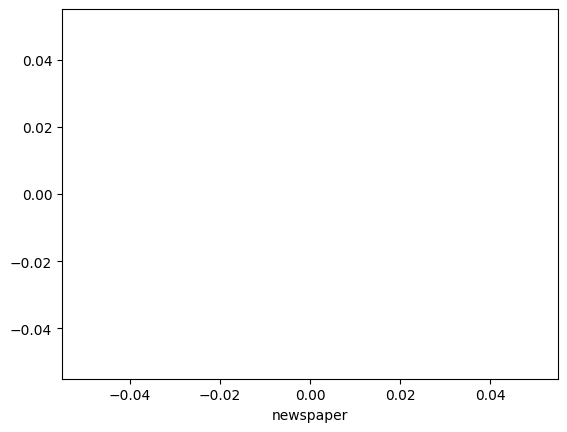

In [ ]:
sns.distplot(new)
plt.show()

In [ ]:
np.log(0)

np.float64(-inf)

In [ ]:
np.log1p(0)

np.float64(0.0)

In [ ]:
#assuming of no multicollinearity : There should be no m.c btw the independent variable
corr_df= X.corr(method= 'pearson')
corr_df

,TV,radio,newspaper
TV,1.000000,0.054809,NaN
radio,0.054809,1.000000,NaN
newspaper,NaN,NaN,NaN


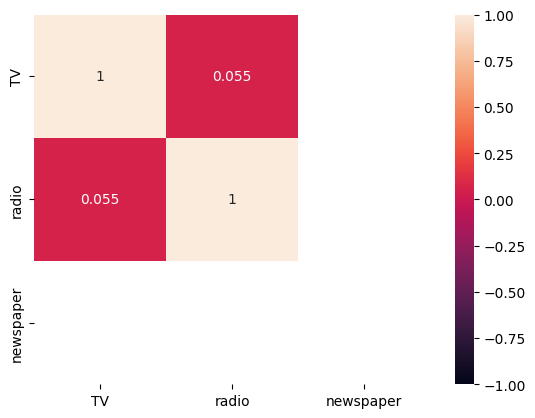

In [ ]:
sns.heatmap(corr_df, vmax=1.0,vmin=-1, annot=True)
plt.show()

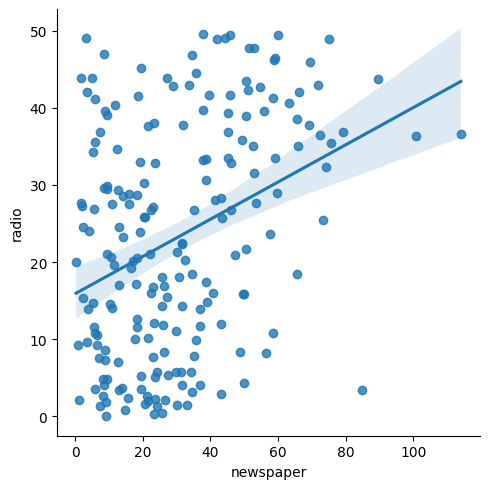

In [ ]:
sns.lmplot(ad , x="newspaper",y="radio")
plt.show()